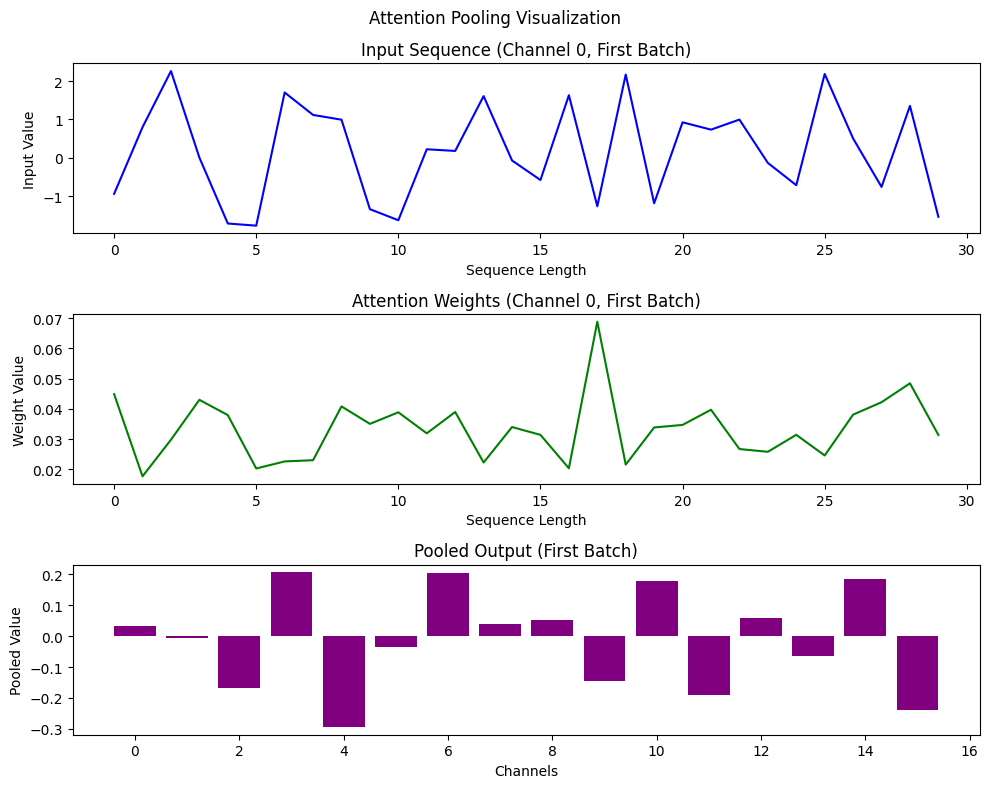

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class AttentionPooling(nn.Module):
    def __init__(self, in_features, hidden_features=None):
        super().__init__()
        if hidden_features is None:
            hidden_features = in_features // 2
            
        # Two-layer attention network
        self.attention_network = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.Tanh(),  # Tanh is commonly used for attention stability
            nn.Linear(hidden_features, 1)
        )
    
    def forward(self, x):
        # x shape: [batch_size, channels, sequence_length]
        batch_size, n_channels, seq_length = x.shape
        
        # Transpose to [batch_size, sequence_length, channels]
        x_trans = x.transpose(1, 2)
        
        # Calculate attention scores
        attention_scores = self.attention_network(x_trans)
        
        # Apply softmax to get attention weights across the sequence length
        attention_weights = F.softmax(attention_scores, dim=1)
        
        # Apply attention weights to input features
        weighted_features = x_trans * attention_weights
        
        # Sum across sequence length to get final pooled features
        pooled_features = weighted_features.sum(dim=1)
        
        return pooled_features, attention_weights

# Visualization function
def visualize_attention_example():
    batch_size, channels, seq_length = 1, 16, 30
    x = torch.randn(batch_size, channels, seq_length)
    
    attention_pool = AttentionPooling(channels)
    pooled, weights = attention_pool(x)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    fig.suptitle("Attention Pooling Visualization")
    
    # Input sequence for one channel
    axs[0].plot(x[0, 0, :].cpu().detach().numpy(), color='blue')
    axs[0].set_title("Input Sequence (Channel 0, First Batch)")
    axs[0].set_xlabel("Sequence Length")
    axs[0].set_ylabel("Input Value")
    
    # Attention weights for the same channel
    axs[1].plot(weights[0, :, 0].cpu().detach().numpy(), color='green')
    axs[1].set_title("Attention Weights (Channel 0, First Batch)")
    axs[1].set_xlabel("Sequence Length")
    axs[1].set_ylabel("Weight Value")
    
    # Pooled output across channels
    axs[2].bar(range(channels), pooled[0].cpu().detach().numpy(), color='purple')
    axs[2].set_title("Pooled Output (First Batch)")
    axs[2].set_xlabel("Channels")
    axs[2].set_ylabel("Pooled Value")
    
    plt.tight_layout()
    plt.show()

# Run visualization
visualize_attention_example()


In [2]:
visualize_attention_example()

Input shape: torch.Size([2, 64, 100])
Pooled output shape: torch.Size([2, 64])
Attention weights shape: torch.Size([2, 100, 1])

Step-by-step computation:
1. Transposed input: torch.Size([2, 100, 64])
2. Attention scores: torch.Size([2, 100, 1])
3. Attention weights (softmax): torch.Size([2, 100, 1])
4. Weighted features: torch.Size([2, 100, 64])
5. Final pooled features: torch.Size([2, 64])


{'input': tensor([[[ 0.9386, -0.5417,  1.3916,  ..., -0.6443,  0.5754, -2.0826],
          [ 0.4932, -0.9981, -0.1054,  ..., -0.4242,  1.2182, -0.0143],
          [-0.7871,  1.4069,  0.1053,  ...,  0.0873, -0.1256, -0.8951],
          ...,
          [ 1.2307,  0.1585, -0.5001,  ...,  1.5325, -0.5765, -0.5873],
          [ 1.1964, -0.4279, -0.2956,  ..., -1.1947,  0.0374, -0.5584],
          [ 2.1265,  0.3920,  0.9001,  ..., -3.1240,  0.7316, -0.5030]],
 
         [[-1.6865, -1.0010,  1.4211,  ..., -0.6160, -1.4212,  0.4013],
          [ 0.7991,  0.1368,  0.7745,  ...,  0.1003,  0.3325,  0.7024],
          [ 0.2876, -1.3420,  0.3168,  ...,  1.4493,  0.8751, -0.5441],
          ...,
          [-1.2370,  1.9377,  0.4140,  ...,  1.8477,  0.7923,  0.6662],
          [-0.3573,  1.9528,  1.4271,  ..., -0.1622,  0.2920,  0.2223],
          [-0.6163,  1.4187,  0.3387,  ..., -1.6834, -1.9152, -1.3793]]]),
 'weights': tensor([[[0.0133],
          [0.0055],
          [0.0083],
          [0.0130],
